<a href="https://colab.research.google.com/github/tripuragorla/CMPE-258-Assignment/blob/main/CMPE_258_Homework_3_Asssignment/CMPE_258_Homework_3_Asssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **part a)**
Using pure Numpy to build a 3 layer neural network (with relu nonlinearity - this is different from the  2 layer i have provided in the colab in slide deck) to train on data

In [ ]:
!python --version

Python 3.7.10


In [ ]:
pip install torchvision

In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1             
tensorboard-plugin-wit        1.8.0             
tensorflow                    2.4.1             
tensorflow-datasets           4.0.1             
tensorflow-estimator          2.4.0             
tensorflow-gcs-config         2.4.0             
tensorflow-hub                0.11.0            
tensorflow-metadata           0.28.0            
tensorflow-probability        0.12.1            


In [ ]:
!pip list | grep torch

torch                         1.8.0+cu101       
torchsummary                  1.5.1             
torchtext                     0.9.0             
torchvision                   0.9.0+cu101       


In [ ]:
pip install git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-cxginsea
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-cxginsea
  Created wheel for Theano: filename=Theano-1.0.5+2.g8e9611715-cp37-none-any.whl size=2668286 sha256=a29a82c9f3b5195beaca5e713b8c544a3561f78485bc095eef8ba49a395deb8a
  Stored in directory: /tmp/pip-ephem-wheel-cache-xnwfcejp/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [1]:
import numpy as np
from typing import Callable
from matplotlib.pyplot import *
from mpl_toolkits import mplot3d


n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))
weights_true_1 = np.array([[5, 1, 2],]).T
bias_true_1 = np.array([1])
y_true_1 = (x ** 3) @ weights_true_1 + x @ weights_true_1 + bias_true_1

weights_true_2 = np.array([[4, 1, 3],]).T
bias_true_2 = np.array([2])
y_true_2 = (x ** 3) @ weights_true_2 + x @ weights_true_2 + bias_true_2

weights_true = np.array(weights_true_1+weights_true_2)
bias_true = np.array(bias_true_1+bias_true_2)
y_true = np.hstack((y_true_1, y_true_2))

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')


x: (200, 3), weights: (3, 1), bias: (1,), y: (200, 2)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


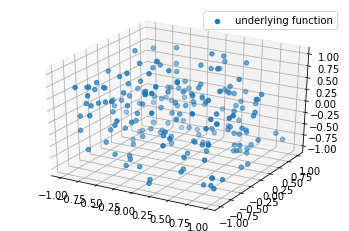

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

In [ ]:
import pandas as pd
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y_true)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

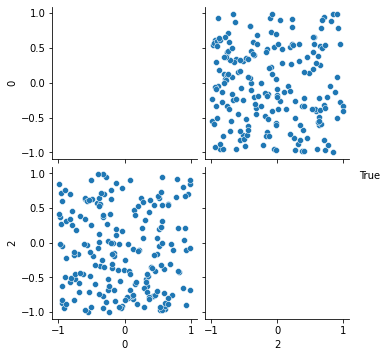

In [ ]:
import seaborn as sns
sns.pairplot(df_x, hue=df_y.any(), palette='bright');

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true_1))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true_1))

26.144050165872805
22.734155037082818


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


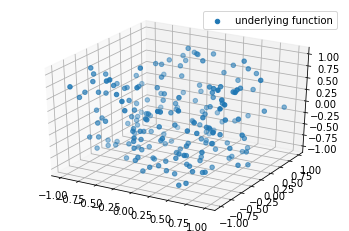

In [ ]:
plot_3d(x, y_true)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

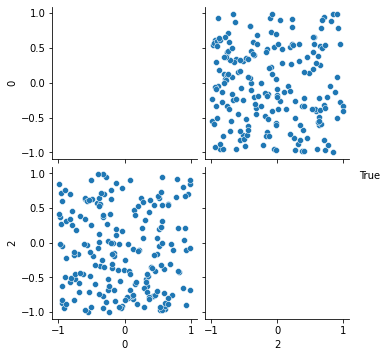

In [ ]:
import seaborn as sns
sns.pairplot(df_x, hue=df_y.any(), palette='bright');

### Adding non-linearity: ReLU

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    def backward(self , output_gradient):
        self.input_gradient = (self.input_ > 0 ) * output_gradient
        return self.input_gradient

In [ ]:
class Model:
  def __init__(self, input_dim, num_hiddenlayer1, num_hiddenlayer2):
    self.linear1 = Linear(input_dim, num_hiddenlayer1)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hiddenlayer1, num_hiddenlayer2)
    self.relu2 = Relu()
    self.linear3 = Linear(num_hiddenlayer2 , 2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu1(l1)

    l2 = self.linear2(r)
    r = self.relu2(l2)

    l3 = self.linear3(r)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)

    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)

    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient

  def update(self, lr):

    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10, 50)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

32.0031910465167
21.23170445541596


Epoch 0, loss 23.32204462594567
Epoch 1, loss 23.19402689602844
Epoch 2, loss 23.112095548881417
Epoch 3, loss 23.059659486707314
Epoch 4, loss 23.026100406915894
Epoch 5, loss 23.004622595849384
Epoch 6, loss 22.990876796766816
Epoch 7, loss 22.98207948535397
Epoch 8, loss 22.976449206049757
Epoch 9, loss 22.972845827295053
Epoch 10, loss 22.970539664892048
Epoch 11, loss 22.96906372095412
Epoch 12, loss 22.96811911683385
Epoch 13, loss 22.967514570196872
Epoch 14, loss 22.967127660349206
Epoch 15, loss 22.966880038046707
Epoch 16, loss 22.9667215597731
Epoch 17, loss 22.966620133677992
Epoch 18, loss 22.966555220977128
Epoch 19, loss 22.96651367684857


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


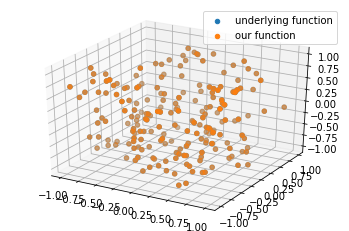

In [ ]:
def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true,y_pred)

# **part b**


### 1) Pure pytorch tensor datastructure to build a 3 layer neural network (with relu nonlinearity) - from scratch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_py = torch.tensor((x), dtype=torch.float)
y_py = torch.tensor((y_true), dtype=torch.float)
xPredicted = torch.tensor(([1,1,1]), dtype=torch.float)

print(X_py.size())
print(y_py.size())

torch.Size([200, 3])
torch.Size([200, 2])


In [4]:
# scale units
X_max, _ = torch.max(X_py, 0)
xPredicted_max, _ = torch.max(xPredicted, 0)

X_py = torch.div(X_py, X_max)
xPredicted = torch.div(xPredicted, xPredicted_max)
y_py = y_py / 100  # max test score is 100

In [ ]:
def relu(self,s):
         return np.maximum(0,s)

def reluPrime(self, s):
        # derivative of sigmoid
   
        s[s<=0] = 0
        s[s>0] = 1
        return s

In [10]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 3
        self.outputSize = 2
        self.hiddenSize = 5
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 2 X 3 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.relu(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))

   
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)

        
    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)

    
    def backward(self, X, y, o ,lr =0.5):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.reluPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.reluPrime(self.z2)

        self.W1 += lr * torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += lr * torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y ,lr=0.5):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o ,lr =0.5)
 #   def update(self,lr):
 #       self.W1 = self.W1 - lr * self.weights_gradient 
 #       self.bias = self.bias - lr * self.bias_gradient
        
    def saveWeights(self, model):
       
        torch.save(model, "NN")
      
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))

In [11]:
NN = Neural_Network()
for i in range(1000):  # trains the NN 1,000 times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y_py - NN(X_py))**2).detach().item()))  # mean sum squared loss
    NN.train(X_py, y_py)
NN.saveWeights(NN)
NN.predict() 

#0 Loss: 26.603422164916992
#1 Loss: 26.86301040649414
#2 Loss: 26.850357055664062
#3 Loss: 26.683704376220703
#4 Loss: 25.025005340576172
#5 Loss: 25.587787628173828
#6 Loss: 25.737295150756836
#7 Loss: 25.304784774780273
#8 Loss: 25.277891159057617
#9 Loss: 25.250822067260742
#10 Loss: 25.23952865600586
#11 Loss: 25.23952865600586
#12 Loss: 25.253009796142578
#13 Loss: 25.253009796142578
#14 Loss: 25.253009796142578
#15 Loss: 25.253009796142578
#16 Loss: 25.253009796142578
#17 Loss: 25.259262084960938
#18 Loss: 25.266931533813477
#19 Loss: 25.266931533813477
#20 Loss: 25.27533531188965
#21 Loss: 25.27533531188965
#22 Loss: 25.27533531188965
#23 Loss: 25.27533531188965
#24 Loss: 25.27533531188965
#25 Loss: 25.284912109375
#26 Loss: 25.284912109375
#27 Loss: 25.284912109375
#28 Loss: 25.284912109375
#29 Loss: 25.284912109375
#30 Loss: 25.284912109375
#31 Loss: 25.284912109375
#32 Loss: 25.284912109375
#33 Loss: 25.284912109375
#34 Loss: 25.284912109375
#35 Loss: 25.284912109375
#36 Los

### 2) Pure pytorch tensor datastructure to build a 3 layer neural network (with relu nonlinearity) - with auto differentiation primitives

In [ ]:
class MyTorchModel(nn.Module):
  def __init__(self, input_dim, num_hiddenlayer1, num_hiddenlayer2):
    super(MyTorchModel, self).__init__()
    self.linear1 = nn.Linear(input_dim , num_hiddenlayer1)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hiddenlayer1 , num_hiddenlayer2)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(num_hiddenlayer2,2)

  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu1(l1)
    l2 = self.linear2(r)
    r = self.relu2(l2)
    l3 = self.linear3(r)
    return l3


In [ ]:
loss = nn.MSELoss()
model = MyTorchModel(d, 10, 50)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(23.5683, grad_fn=<MseLossBackward>)


In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(26.2176, grad_fn=<MseLossBackward>)
tensor(24.7987, grad_fn=<MseLossBackward>)


In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)

tensor(24.7084, grad_fn=<MseLossBackward>)
tensor(22.6001, grad_fn=<MseLossBackward>)
tensor(19.2183, grad_fn=<MseLossBackward>)
tensor(14.1827, grad_fn=<MseLossBackward>)
tensor(9.6649, grad_fn=<MseLossBackward>)
tensor(6.5243, grad_fn=<MseLossBackward>)
tensor(4.8384, grad_fn=<MseLossBackward>)
tensor(9.5748, grad_fn=<MseLossBackward>)
tensor(53.4467, grad_fn=<MseLossBackward>)
tensor(43.6348, grad_fn=<MseLossBackward>)
tensor(27.2442, grad_fn=<MseLossBackward>)
tensor(26.5307, grad_fn=<MseLossBackward>)
tensor(25.8558, grad_fn=<MseLossBackward>)
tensor(25.1349, grad_fn=<MseLossBackward>)
tensor(24.2999, grad_fn=<MseLossBackward>)
tensor(23.2455, grad_fn=<MseLossBackward>)
tensor(21.8413, grad_fn=<MseLossBackward>)
tensor(19.9326, grad_fn=<MseLossBackward>)
tensor(17.3158, grad_fn=<MseLossBackward>)
tensor(13.6062, grad_fn=<MseLossBackward>)
tensor(8.5237, grad_fn=<MseLossBackward>)
tensor(4.2361, grad_fn=<MseLossBackward>)
tensor(3.0708, grad_fn=<MseLossBackward>)
tensor(2.8984, gra

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


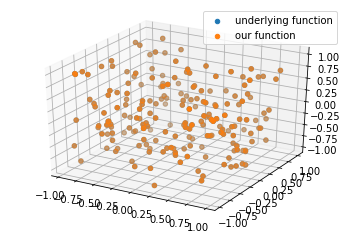

In [ ]:
plot_3d(x, y_true, model(x_tensor).detach())

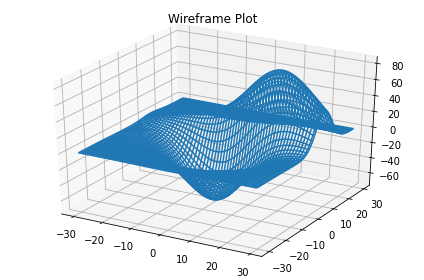

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x, y, z = axes3d.get_test_data()

ax.plot_wireframe(x, y, z, rstride = 2, cstride = 2)

plt.title("Wireframe Plot")
plt.tight_layout()
plt.show()

### 3) Pure pytorch linear modules datastructure to build a 3 layer neural network (with relu nonlinearity) - high level primitives

In [ ]:
#### using high level premitives doing the pytorch implementation
#Installing pytorch lighting
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade 

In [ ]:
import os

import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import pytorch_lightning as pl


class CoolSystem(pl.LightningModule):
  

    def __init__(self,classes=2):
        super(CoolSystem,self).__init__()
       # self.save_hyperparameters()
        self.save_hyperparameters()
        # not the best model...
        self.layer1 = torch.nn.Linear(3, 12)
        self.layer2 = torch.nn.Linear(12, 24)
        self.layer3 = torch.nn.Linear(24, 24)
        self.layer4 = torch.nn.Linear(24, 2)
        
           # Log hyperparameters
        

    def forward(self, x):
        # x = x.view(x.size(0),-1)

         x = self.layer1(x)
         x = torch.relu(x)

         x = self.layer2(x)
         x = torch.relu(x)

         x = self.layer3(x)
         x = torch.relu(x)


         x = self.layer4(x)

         return x

#torch.relu(self.l1(x.view(x.size(0), -1)))
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        #loss = F.cross_entropy(y_hat, y)
        loss= F.mse_loss(y_hat, y)   
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
      #  loss = F.cross_entropy(y_hat, y)
        loss= F.mse_loss(y_hat, y)  
        return {'val_loss': loss}

    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        return {'val_loss': avg_loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

In [ ]:
from pytorch_lightning import Trainer, seed_everything
seed_everything(0)

Global seed set to 0


0

In [ ]:
import tensorflow as tf

x_tensor

dataset  = tf.concat([x_tensor, y_true_tensor], 1)
dataset[:20]

<tf.Tensor: shape=(20, 5), dtype=float32, numpy=
array([[-4.7336859e-03, -4.4241717e-01, -3.9513752e-01, -4.6634528e-01,
         8.1556730e-02],
       [ 4.8728544e-01, -1.2578592e-01, -1.6242303e-01,  3.5537579e+00,
         3.7840600e+00],
       [-9.5902681e-01, -3.8944367e-01,  7.2076619e-01, -6.4634695e+00,
        -2.5271878e+00],
       [ 6.0700899e-01,  4.9302173e-01, -9.5374322e-01,  2.1236122e+00,
         4.7165164e-01],
       [-9.4601941e-01, -3.7707007e-01, -5.1093455e-02, -8.4964466e+00,
        -5.7550116e+00],
       [ 8.1948256e-01, -2.3074037e-01, -4.2295000e-01,  6.6087914e+00,
         5.7403741e+00],
       [ 1.4230594e-01,  8.2938862e-01,  4.7727743e-01,  4.2978482e+00,
         5.7386589e+00],
       [ 7.1333259e-01, -6.3560474e-01, -7.4867111e-01,  3.1525354e+00,
         1.9079208e+00],
       [ 8.8142268e-02,  3.9474165e-01,  9.0997612e-01,  5.2273612e+00,
         7.8020220e+00],
       [-2.5693119e-01, -3.0688629e-01,  3.1708594e-02, -6.4176840e-01,
      

In [ ]:
from sklearn.model_selection import train_test_split


y = np.hstack((y_true_1, y_true_2))
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

# From numpy to torch tensors
x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.FloatTensor)

# From numpy to torch tensors
x_val = torch.from_numpy(x_val).type(torch.FloatTensor)
y_val = torch.from_numpy(y_val).type(torch.FloatTensor)

# Implements Dataset and DataLoader
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=5)


# Implements Dataset and DataLoader
val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=5)

In [ ]:

# model
from pytorch_lightning import Trainer

model = CoolSystem()

# most basic trainer, uses good defaults]
#num_tpu_cores=8,
trainer = Trainer( progress_bar_refresh_rate=20, max_epochs=10)
trainer.fit(model,train_dataloader,val_dataloader)
# Testing the model
trainer.test()


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name   | Type   | Params
----------------------------------
0 | layer1 | Linear | 48    
1 | layer2 | Linear | 312   
2 | layer3 | Linear | 600   
3 | layer4 | Linear | 50    
----------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params
0.004     Total estimated model params size (MB)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The validation_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: The {log:dict keyword} was deprecated in 0.9.1 and will be removed in 1.0.0
Please use self.log(...) inside the lightningModule instead.
# log on a step or aggregate epoch metric to the logger and/or progress bar (inside LightningModule)
self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
  warnings.warn(*args, **kwargs)


1

# **part c**


### 1) Pure tensorflow tensor datastructure to build a 3 layer neural network (with relu nonlinearity) - from scratch

In [13]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense

2.4.1


In [14]:
class Linear(keras.layers.Layer):

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(3)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((2, 2)))
assert len(linear_layer.weights) == 2

In [15]:
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.]  # Targets
y_pred = [1., 1., 1., 0.]  # Predictions
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 11.522857


In [16]:
m = tf.keras.metrics.AUC()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 0.6666667
Final result: 0.71428573


In [17]:
from tensorflow.keras import layers
# Prepare a dataset.
x_train = tf.Variable(x, trainable=True, dtype=tf.float32)
y_k = np.hstack((y_true_1, y_true_2))
y_train = tf.Variable(y_k, trainable=True, dtype=tf.float32)

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset


<TensorSliceDataset shapes: ((3,), (2,)), types: (tf.float32, tf.float32)>

In [18]:
def loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

In [19]:

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [20]:

class MLP(keras.layers.Layer):

  def __init__(self):
    super(MLP ,self).__init__()
    self.linear_1 = Linear(3)
    self.linear_2 = Linear(10)
    self.linear_3 = Linear(2)
    

  def call(self,inputs):
    l1=self.linear_1(inputs)
    r=tf.nn.relu(l1)

    l2=self.linear_2(r)
    r=tf.nn.relu(l2) 
    
    l3=self.linear_3(r)

    return l3


In [21]:
mlp = MLP()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
optimizer = tf.keras.optimizers.Adam()

In [23]:
with tf.GradientTape() as tape:
    logits = mlp(x_train)
    loss_value = loss_function(y_train , logits)
    print(loss_value)
gradient = tape.gradient(loss_value , mlp.trainable_weights)
optimizer.apply_gradients(zip(gradient , mlp.trainable_weights))


tf.Tensor(
[9.50596619e+00 4.88741350e+00 3.65689507e+01 1.05928338e+00
 1.80805671e+00 6.93529987e+00 9.47565734e-01 3.79231334e+00
 3.07101822e+01 4.55182314e+00 2.55179739e+00 1.75560028e+02
 6.75697517e+00 2.06561729e-01 1.96317444e+01 4.85859261e+01
 1.62682457e+01 6.08508635e+00 8.34102631e+01 2.80213928e+01
 1.76131845e-01 8.03380871e+00 7.07957840e+01 2.62652659e+00
 1.99668236e+01 2.38774553e-01 3.59945221e+01 1.90396179e+02
 8.30063171e+01 1.04573040e+01 1.77784252e+01 4.65987473e+01
 4.83262711e+01 1.08798056e+01 3.15568995e+00 1.35497627e+01
 1.75153589e+00 1.23786354e+00 9.56829605e+01 6.87291336e+00
 1.51250553e+01 2.66962280e+01 5.51759911e+00 7.96102066e+01
 9.69450188e+00 2.55741149e-01 3.98770618e+00 6.58294601e+01
 7.70759125e+01 5.22710383e-01 1.04306183e+02 3.40041046e+01
 3.82865067e+01 3.56234694e+00 2.06159439e+01 1.09335003e+01
 2.19205573e-01 2.46174583e+01 2.33477974e+00 5.23322010e+00
 3.08879433e+01 5.21419411e+01 1.66976471e+01 4.01390991e+01
 2.73548698e+

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

### 2) Pure tensorflow tensor datastructure to build a 3 layer neural network (with relu nonlinearity) - with auto differentiation primitives

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(3,))
layer1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
layer2 = layers.Dense(30, activation='relu', name='dense_2')(layer1)
outputs = layers.Dense(2, name='regression')(layer2)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
regression (Dense)           (None, 2)                 62        
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
model.fit(x, y_true, epochs=100)
y_pred = model.predict(x)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 26.2150
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 22.9423
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 23.8358
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 24.8420
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 21.9974
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 22.7780
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 21.9284
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 25.6088
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 22.7591
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 25.2263
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 23.9935
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 25.9843
Epoch 13/100
7/7 [==============================]

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


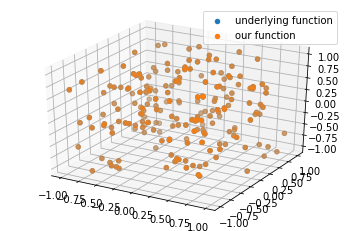

In [ ]:
plot_3d(x, y_true, y_pred)

### 3) pure tensorflow keras linear modules datastructure to build a 3 layer neural network (with relu nonlinearity) -  Model subclassing

In [ ]:
# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [ ]:
model.fit(dataset, epochs=3)

Epoch 1/3
938/938 [==============================] - 5s 5ms/step - loss: 0.3856 - sparse_categorical_accuracy: 0.8921
Epoch 2/3
938/938 [==============================] - 5s 5ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9694
Epoch 3/3
938/938 [==============================] - 5s 5ms/step - loss: 0.0615 - sparse_categorical_accuracy: 0.9815


In [ ]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('loss: %.3f - acc: %.3f' % (loss, acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9751
loss: 0.080 - acc: 0.975


In [ ]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]

model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=30,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/30
938/938 [==============================] - 6s 6ms/step - loss: 0.4028 - sparse_categorical_accuracy: 0.8812 - val_loss: 0.1113 - val_sparse_categorical_accuracy: 0.9651
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0884 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.0829 - val_sparse_categorical_accuracy: 0.9729
Epoch 3/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0560 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0782 - val_sparse_categorical_accuracy: 0.9768
Epoch 4/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0388 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.0751 - val_sparse_categorical_accuracy: 0.9786
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0311 - sparse_categorical_accuracy: 0.9903 - val_loss: 0.0735 - val_sparse_categorical_accuracy: 0.9786
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0224 - sparse_categorica

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


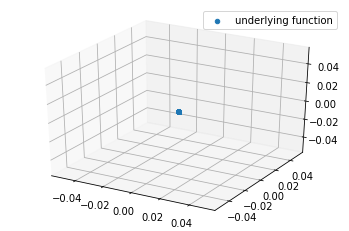

In [ ]:
plot_3d(x_test, y_test)

### References

[1] “Let’s code a Neural Network in plain NumPy” by Piotr Skalski https://link.medium.com/HGGPlI2Nveb
[2] https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0
[3] https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing&authuser=1#scrollTo=ZydPQYKIUtNT (a)
[4] https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing (pytorch)
[5] https://docs.google.com/presentation/d/1bOpBbthfNXBakDWb_qezukZ-XgjvlwTvwVLVjrxxAh0/edit#slide=id.gbb803640d1_0_514 (pytorch)
[6] https://docs.google.com/presentation/d/1bOpBbthfNXBakDWb_qezukZ-XgjvlwTvwVLVjrxxAh0/edit#slide=id.gbb803640d1_0_425 (generate data for 2 dimension)
[7] https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO?authuser=1#scrollTo=4jNl1ykEdkj8 (tensorflow)
[8] https://discuss.pytorch.org/t/a-model-with-multiple-outputs/10440
[9] https://discuss.pytorch.org/t/multiple-outputs-of-a-nn/68946
[10] https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing#scrollTo=oUzGijLkOUiy
[11] https://towardsdatascience.com/pytorch-lightning-making-your-training-phase-cleaner-and-easier-845c4629445b
